# Transformation

This notebook is focused on **data transformation and preprocessing** — specifically using **`PowerTransformer` (Box-Cox method)** to normalize skewed data and make distributions more Gaussian.

Here’s a short summary:

*  **Purpose:** Demonstrate how to use the **Box-Cox PowerTransformer** to stabilize variance and reduce skewness in numeric data.
*  **Steps included:**

  1. **Importing libraries** — pandas, NumPy, sklearn’s PowerTransformer, matplotlib, seaborn, and scipy.
  2. **Loading data** — reads an Excel file named `Raisin_Dataset.xlsx` into a DataFrame.
  3. **Data exploration** — checks for null values, data info, and distributions.
  4. **Transformation step** — applies the PowerTransformer to normalize features.
  5. **Visualization** — plots before and after transformation to compare distribution shapes.
  6. **Train-test split** — likely for further modeling or validation steps.

In short:

> The notebook demonstrates how to apply and visualize the **Box-Cox transformation** using scikit-learn’s PowerTransformer to make data more suitable for machine learning.


##  PowerTransformer (Box-Cox Method)

The `PowerTransformer` applies the **Box-Cox transformation** to make data more **Gaussian (normal)** by **reducing skewness** and **stabilizing variance**.

---

###  Function of the Transformation

The transformation is defined as:

$$
y = \frac{x^\lambda - 1}{\lambda} \quad (\lambda \neq 0)
$$

$$
y = \log(x) \quad (\lambda = 0)
$$

- The transformer automatically finds the best **λ (lambda)** that makes the data as close to normal as possible.  
- Works **only for positive values**.  
- For data with zero or negative values, use **Yeo-Johnson** instead.

---

###  Why It’s Used

-  Makes **skewed data** more symmetric.  
-  **Stabilizes variance** across the dataset.  
-  **Reduces the effect of outliers**.  
-  Improves model performance for algorithms assuming normally distributed data (e.g., linear models).

---

###  Plots Interpretation

- **KDE Plot:** Shows the data distribution — should appear more **bell-shaped** after transformation.  
- **Q-Q Plot:** Compares data to a normal distribution — points should lie closer to the **diagonal line** if normality is achieved.

---

###  In Short

 The **Box-Cox transformation** adjusts **positive, skewed data** using an optimal power ($\lambda$) to make it **more normal**, improving **statistical stability** and **model performance**.


### Libraries

In [32]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import FunctionTransformer, PowerTransformer
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


## Dataframe

In [4]:
df= pd.read_excel('Raisin_Dataset.xlsx')
df.head()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
0,87524,442.246011,253.291155,0.819738,90546,0.758651,1184.040,Kecimen
1,75166,406.690687,243.032436,0.801805,78789,0.684130,1121.786,Kecimen
2,90856,442.267048,266.328318,0.798354,93717,0.637613,1208.575,Kecimen
3,45928,286.540559,208.760042,0.684989,47336,0.699599,844.162,Kecimen
4,79408,352.190770,290.827533,0.564011,81463,0.792772,1073.251,Kecimen


# Data Distributions

In [6]:
df.isnull().sum()

Area               0
MajorAxisLength    0
MinorAxisLength    0
Eccentricity       0
ConvexArea         0
Extent             0
Perimeter          0
Class              0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             900 non-null    int64  
 1   MajorAxisLength  900 non-null    float64
 2   MinorAxisLength  900 non-null    float64
 3   Eccentricity     900 non-null    float64
 4   ConvexArea       900 non-null    int64  
 5   Extent           900 non-null    float64
 6   Perimeter        900 non-null    float64
 7   Class            900 non-null    object 
dtypes: float64(5), int64(2), object(1)
memory usage: 56.4+ KB


# train test split

Train-test split is done **before transformation** to **prevent data leakage** and ensure **unbiased model evaluation**.


In [9]:
X=df.iloc[:,:7]
y=df[['Class']]
y.head()

,Class
0,Kecimen
1,Kecimen
2,Kecimen
3,Kecimen
4,Kecimen


In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
X_train.shape

(720, 7)

## PDF Graph

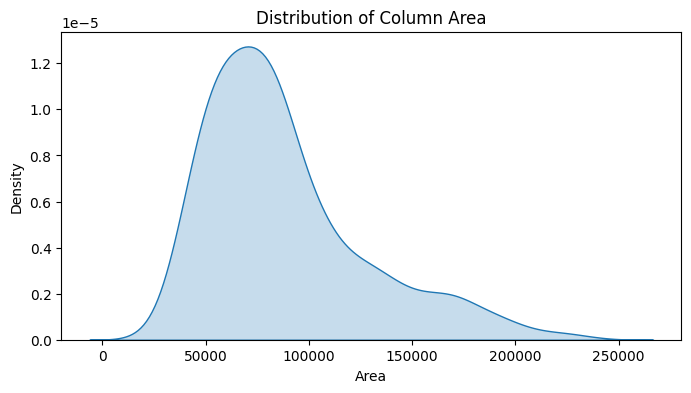

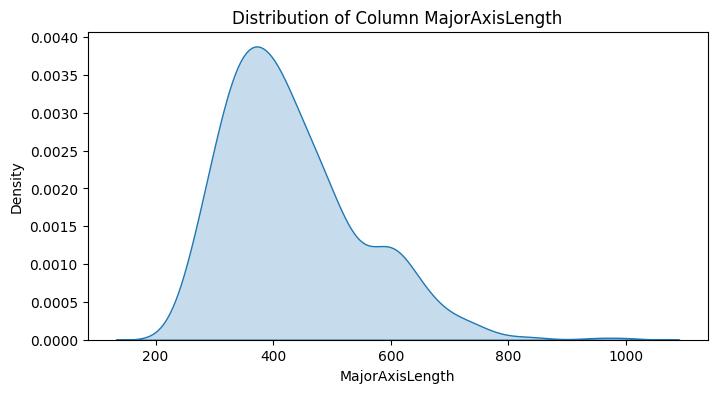

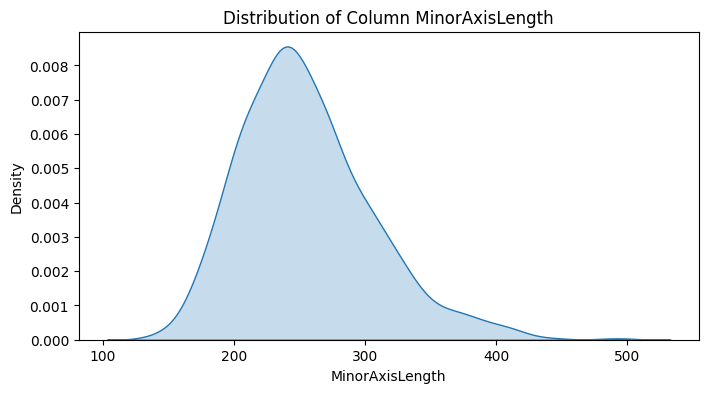

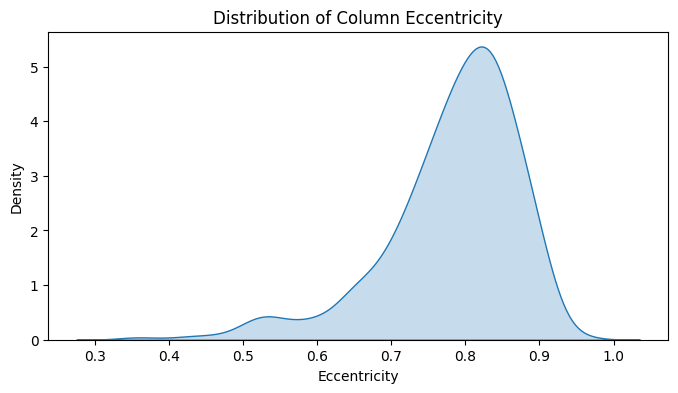

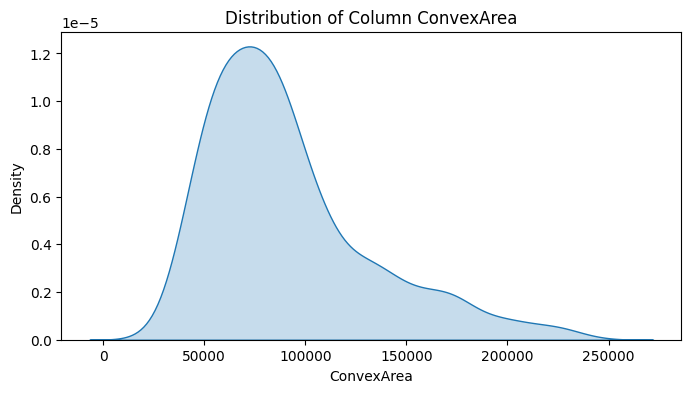

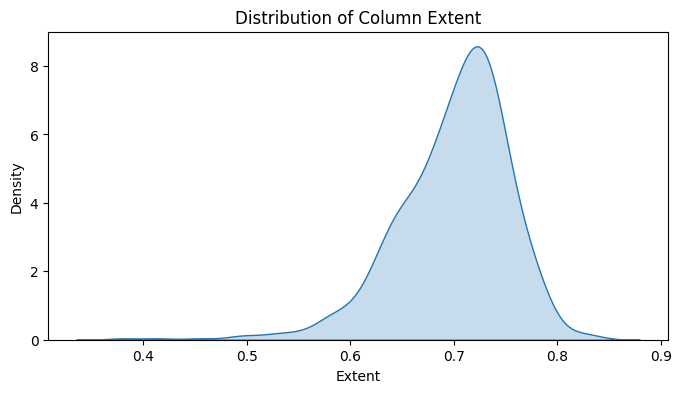

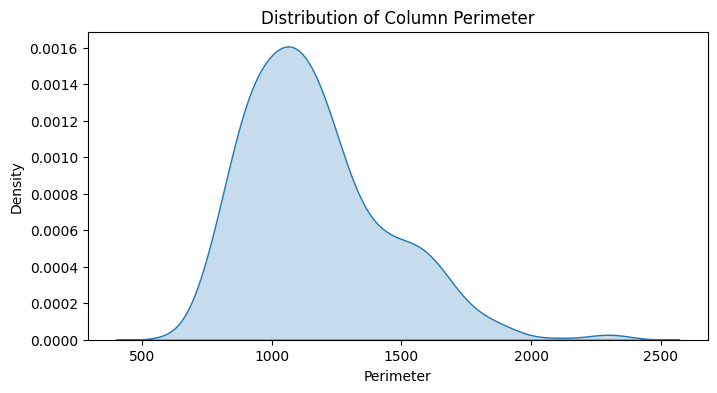

In [14]:
for i in range(0, 7):
    plt.figure(figsize=(8, 4))
    sns.kdeplot(x=X_train.iloc[:, i], fill=True)
    plt.title(f"Distribution of Column {X_train.columns[i]}")
    plt.xlabel(X_train.columns[i])
    plt.ylabel("Density")
    plt.show()


### KdePlot and QQ plot

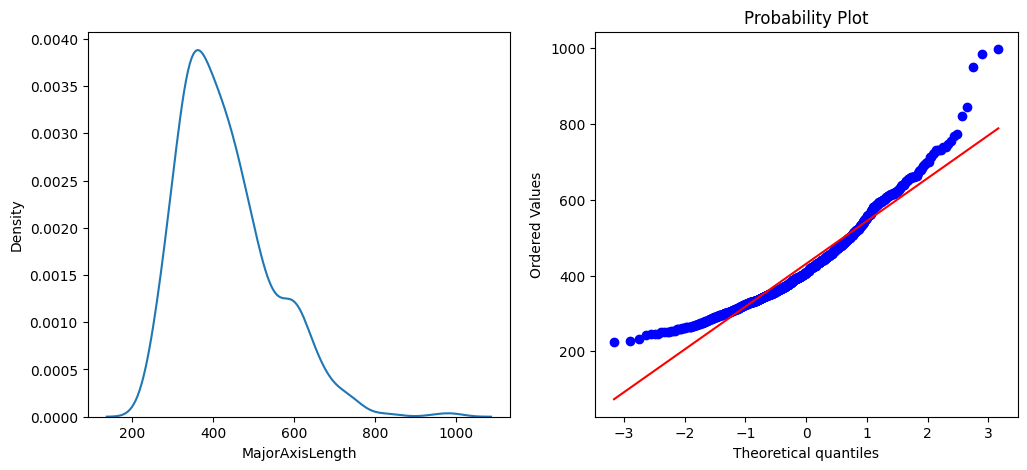

In [15]:
fig, (ax1, ax2)= plt.subplots(ncols=2, figsize=(12,5))
sns.kdeplot(x=df['MajorAxisLength'], ax=ax1)
stats.probplot(df['MajorAxisLength'], dist="norm", plot=ax2)
plt.show()

## Function transformer

In [17]:
trf= FunctionTransformer(func=np.log1p)
X_train_trf = pd.DataFrame(trf.fit_transform(X_train['MajorAxisLength']))

`np.log1p` applies a **natural logarithm** transformation to the `MajorAxisLength` column, where it computes `log(1 + x)` for each value in the data. This transformation is particularly useful for **right-skewed data**, which typically has a long tail of higher values. By applying `np.log1p`, the large values are compressed, and the range of the data is reduced, making the distribution more symmetric. This helps **reduce the skewness** and brings the data closer to a normal distribution, making it more suitable for machine learning algorithms that assume normality. The transformation is especially beneficial when the data contains **outliers**, as it lessens their influence while maintaining the structure of smaller values.

**Comparison** via KDE plot and QQ Plot after transformation.

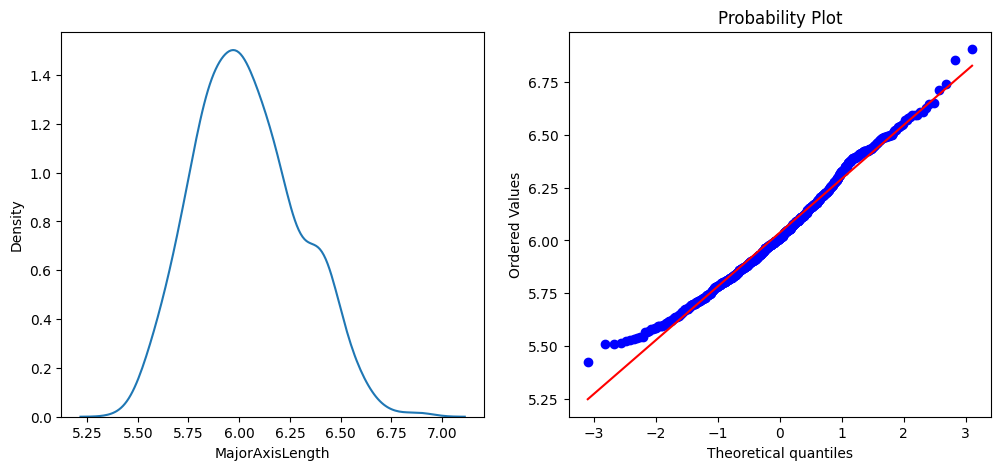

In [18]:
fig, (ax1, ax2)= plt.subplots(ncols=2, figsize=(12,5))
sns.kdeplot(x=X_train_trf['MajorAxisLength'], ax=ax1)
stats.probplot(X_train_trf['MajorAxisLength'], dist="norm", plot=ax2)
plt.show()

here the value is right skewed. 

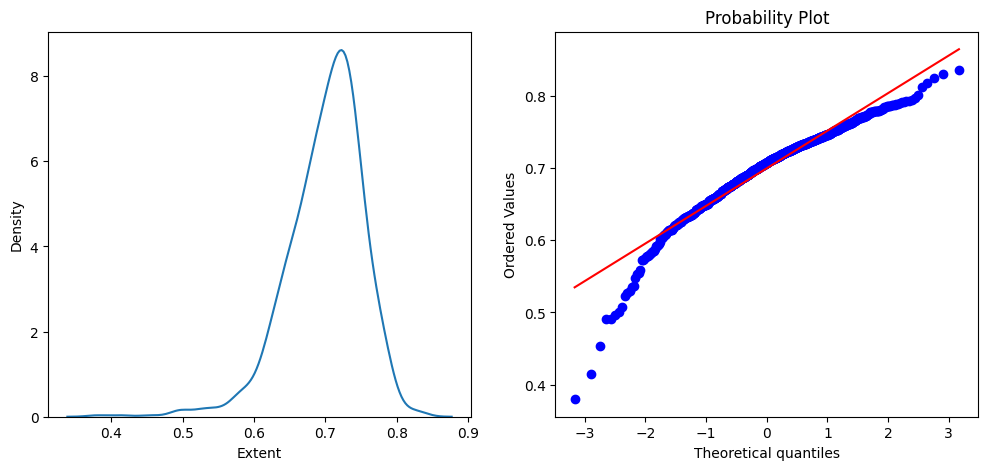

In [19]:
fig, (ax1, ax2)= plt.subplots(ncols=2, figsize=(12,5))
sns.kdeplot(x=df['Extent'], ax=ax1)
stats.probplot(df['Extent'], dist="norm", plot=ax2)
plt.show()

here data is left skewwed

# Box-Cox

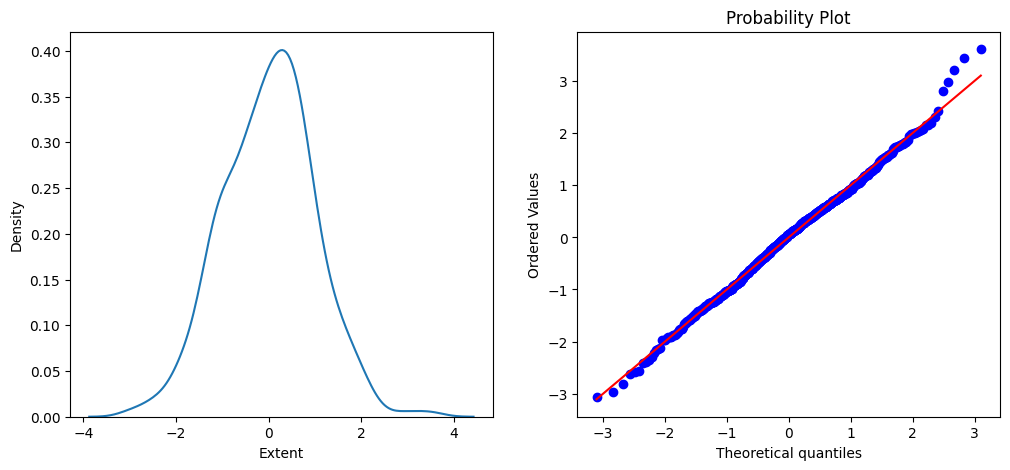

In [36]:
trf= PowerTransformer(method='box-cox', copy=True)
X_train_trf1 = pd.DataFrame(trf.fit_transform(X_train[['Extent']]), columns=['Extent'])

fig, (ax1, ax2)= plt.subplots(ncols=2, figsize=(12,5))
sns.kdeplot(x=X_train_trf1['Extent'], ax=ax1) 
stats.probplot(X_train_trf1['Extent'], dist="norm", plot=ax2)
plt.show()

The code applies the **Box-Cox transformation** to the `Extent` column of `X_train` using the `PowerTransformer` from `sklearn`. This transformation helps normalize the data by stabilizing variance and reducing skewness, making the data more Gaussian-like. The code then creates two plots: a **KDE plot** to visualize the distribution of the transformed data (aiming for a bell curve) and a **Q-Q plot** to compare the data to a normal distribution. If the transformed data is normal, the points on the Q-Q plot will align along the diagonal line.


# Yeo-Johnson transformation

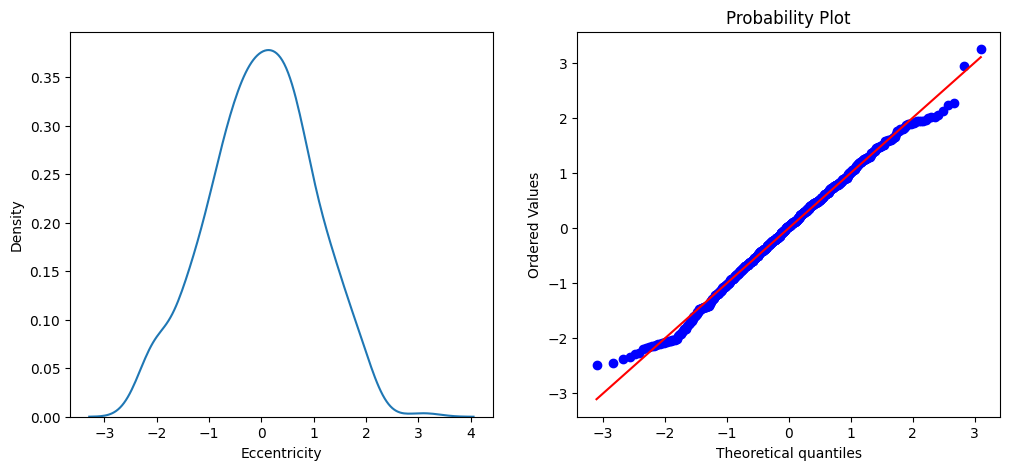

In [38]:
trf= PowerTransformer()
X_train_trf1 = pd.DataFrame(trf.fit_transform(X_train[['Eccentricity']]), columns=['Eccentricity'])

fig, (ax1, ax2)= plt.subplots(ncols=2, figsize=(12,5))
sns.kdeplot(x=X_train_trf1['Eccentricity'], ax=ax1) 
stats.probplot(X_train_trf1['Eccentricity'], dist="norm", plot=ax2)
plt.show()

The code applies the **Yeo-Johnson transformation** (default in `PowerTransformer`) to the `Eccentricity` column to normalize the data, handling both positive and negative values. It then creates two plots: a **KDE plot** to visualize the transformed distribution (aiming for normality) and a **Q-Q plot** to compare the transformed data to a normal distribution. If the data is normal, the Q-Q plot points should align along the diagonal.
